# Scaling
Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [154]:
import pandas as pd
import numpy as np

import acquire
import wrangle as w

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

In [75]:
# get data
df = w.wrangle_telco()

In [76]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0002-ORFBO,65.6,9,593.30
1,0003-MKNFE,59.9,9,542.40
2,0004-TLHLJ,73.9,4,280.85
3,0011-IGKFF,98.0,13,1237.85
4,0013-EXCHZ,83.9,3,267.40


In [77]:
train, test, split = w.banana_split(df)

train --> (3943, 4)
validate --> (1691, 4)
test --> (1409, 4)


In [ ]:
# use Min_max scaler

In [8]:
mm_scaler = MinMaxScaler()

In [10]:
mm_scaler.fit(train[['monthly_charges']])

MinMaxScaler()

In [12]:
train['monthly_charges_minmax'] = mm_scaler.transform(train[['monthly_charges']])

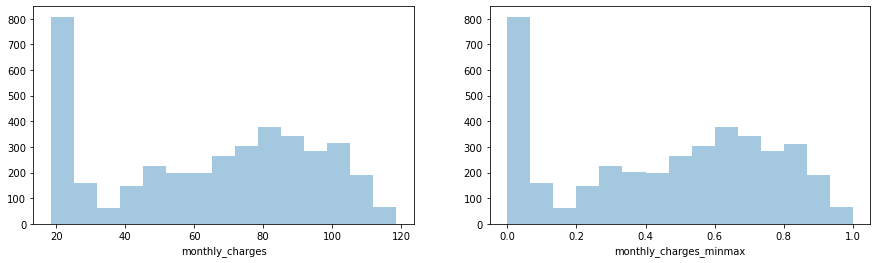

In [41]:
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.distplot(train.monthly_charges, kde = False)

plt.subplot(122)
sns.distplot(train.monthly_charges_minmax, kde = False)

plt.show()

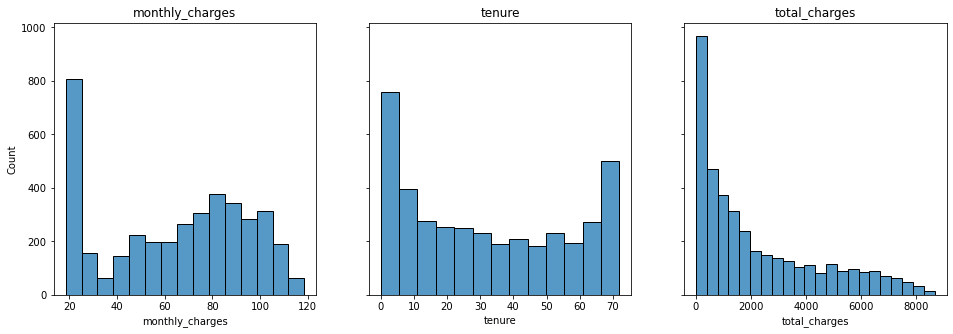

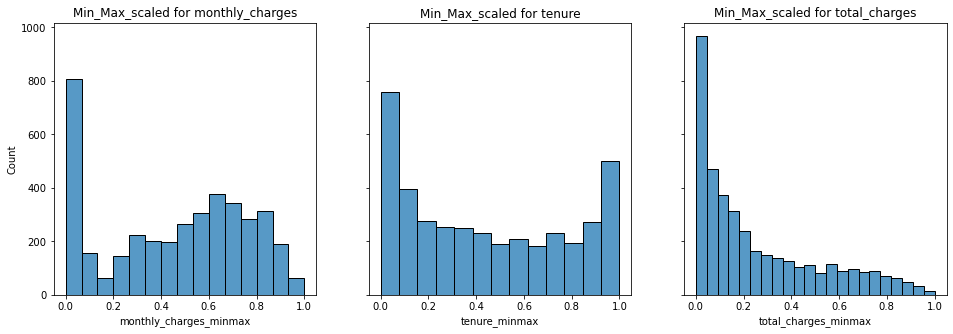

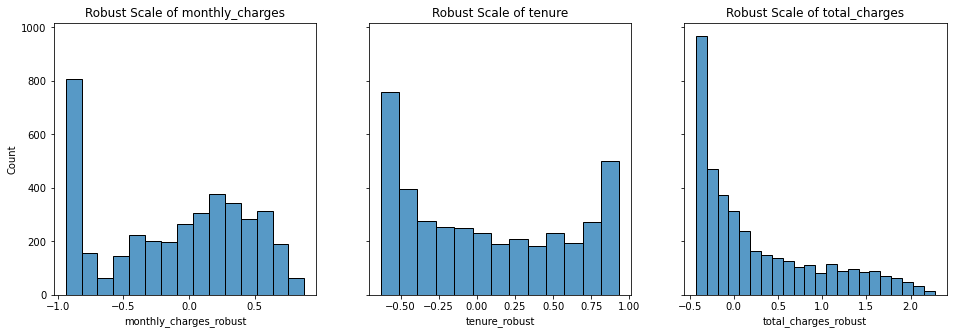

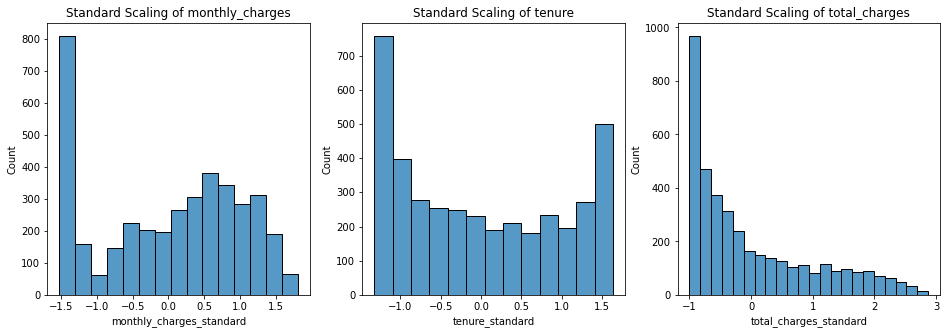

In [80]:
# OK let's loop this mamma jamma

# create lists
col_names = ['monthly_charges', 'tenure', 'total_charges']


# plot regular scales

fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    sns.histplot(x = train[col], kde = False, ax = ax)
    ax.set(title = col)
    

# use MinMax scales
    
fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    mm_scaler = MinMaxScaler()

    mm_scaler.fit(train[{col}])

    train[f'{col}_minmax'] = mm_scaler.transform(train[[col]])
    
    sns.histplot(x = train[f'{col}_minmax'], kde = False, ax = ax)
    
    ax.set(title = f'Min_Max_scaled for {col}')
        

# use RobustScaler
        
fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    robust_scaler = RobustScaler()

    robust_scaler.fit(train[{col}])

    train[f'{col}_robust'] = robust_scaler.transform(train[[col]])
    
    sns.histplot(x = train[f'{col}_robust'], kde = False, ax = ax)
    
    ax.set(title = f'Robust Scale of {col}')

    
# use StandardScaler
fig, axs = plt.subplots(1, 3, figsize=(16,5))

for ax, col in zip(axs, col_names):
    
    standard_scaler = StandardScaler()

    standard_scaler.fit(train[{col}])

    train[f'{col}_standard'] = standard_scaler.transform(train[[col]])
    
    sns.histplot(x = train[f'{col}_standard'], kde = False, ax = ax)
    
    ax.set(title = f'Standard Scaling of {col}')

In [64]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_minmax,tenure_minmax,total_charges_minmax,monthly_charges_robust,tenure_robust,total_charges_robust,monthly_charges_standard,tenure_standard,total_charges_standard
2118,3043-TYBNO,60.65,3,196.90,0.421446,0.041667,0.022710,-0.173321,-0.565217,-0.367850,-0.120254,-1.197107,-0.911654
6206,8778-LMWTJ,74.85,9,708.20,0.563092,0.125000,0.081683,0.084392,-0.434783,-0.208567,0.351949,-0.950946,-0.683290
877,1269-FOYWN,20.00,44,860.85,0.015960,0.611111,0.099290,-0.911071,0.326087,-0.161012,-1.472019,0.484999,-0.615112
2407,3446-QDSZF,55.50,4,227.35,0.370075,0.055556,0.026222,-0.266788,-0.543478,-0.358364,-0.291511,-1.156080,-0.898054
2780,3956-MGXOG,80.60,28,2244.95,0.620449,0.388889,0.258930,0.188748,-0.021739,0.270171,0.543157,-0.171433,0.003074


In [78]:
# function to do plots ya welcome future heather
def make_and_see_scalers(col_names, scaler = MinMaxScaler, scaler_name = 'This Scaler'):
    
    num_graphs_accross = len(col_names)
    
    
    fig, axs = plt.subplots(1, num_graphs_accross, figsize=(16,5))

    for ax, col in zip(axs, col_names):
    
        the_scaler = scaler()
    
        the_scaler.fit(train[{col}])
    
        train[f'{col}_{scaler_name}'] = the_scaler.transform(train[[col]])
        
        sns.histplot(x = train[f'{col}_{scaler_name}'], kde = False, ax = ax)
        
        ax.set(title = f'{scaler_name} of {col}')

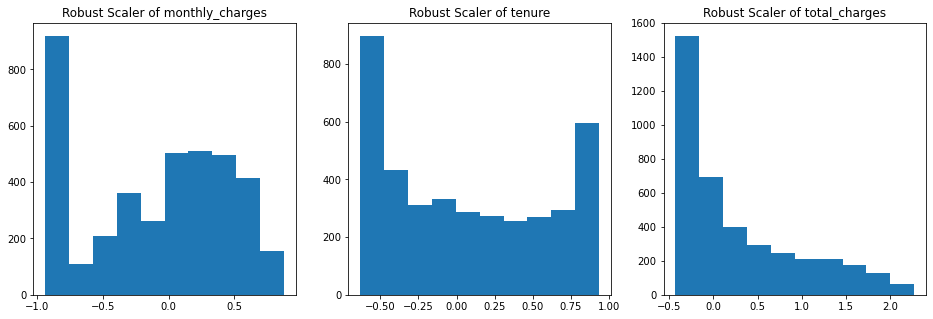

In [173]:
make_and_see_scalers(col_names, scaler = RobustScaler(), scaler_name = 'Robust Scaler')

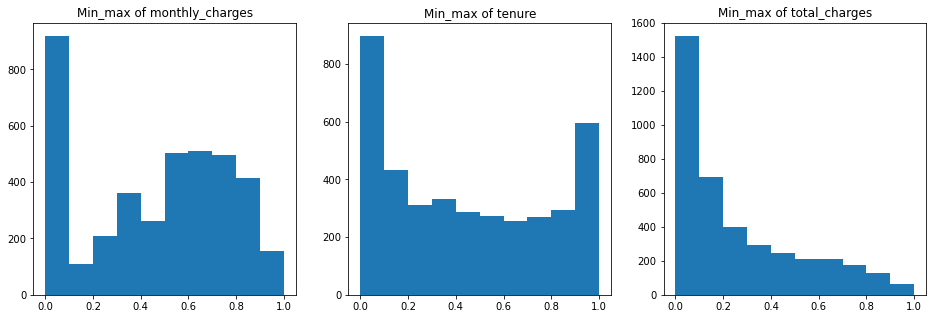

In [172]:
make_and_see_scalers(col_names, scaler = MinMaxScaler(), scaler_name='Min_max')

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [99]:
train.columns

Index(['customer_id', 'monthly_charges', 'tenure', 'total_charges',
       'monthly_charges_Robust Scaler', 'tenure_Robust Scaler',
       'total_charges_Robust Scaler', 'monthly_charges_minmax',
       'tenure_minmax', 'total_charges_minmax', 'monthly_charges_robust',
       'tenure_robust', 'total_charges_robust', 'monthly_charges_standard',
       'tenure_standard', 'total_charges_standard', 'monthly_charges_Min_max',
       'tenure_Min_max', 'total_charges_Min_max'],
      dtype='object')

In [97]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(train[['monthly_charges']])

train['monthly_charges_minmax'] = mm_scaler.transform(train[['monthly_charges']])
print(train.monthly_charges_minmax.head())

mm_scaler.inverse_transform(train[['monthly_charges_minmax']])



2118    0.421446
6206    0.563092
877     0.015960
2407    0.370075
2780    0.620449
Name: monthly_charges_minmax, dtype: float64


array([[60.65],
       [74.85],
       [20.  ],
       ...,
       [69.  ],
       [95.95],
       [54.65]])

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [167]:
# adjust function to take in the keyword arguement (same as the function above)

def make_and_see_scalers(col_names, scaler = MinMaxScaler(), scaler_name = 'This Scaler'):
    
    num_graphs_accross = len(col_names)
    
    fig, axs = plt.subplots(1, num_graphs_accross, figsize=(16,5))

    for ax, col in zip(axs, col_names):
    
        the_scaler = scaler
    
        the_scaler.fit(train[[col]])
    
        train[f'{col}_{scaler_name}'] = the_scaler.transform(train[[col]])

        ax.hist(x = train[f'{col}_{scaler_name}'])
        
        ax.set(title = f'{scaler_name} of {col}')


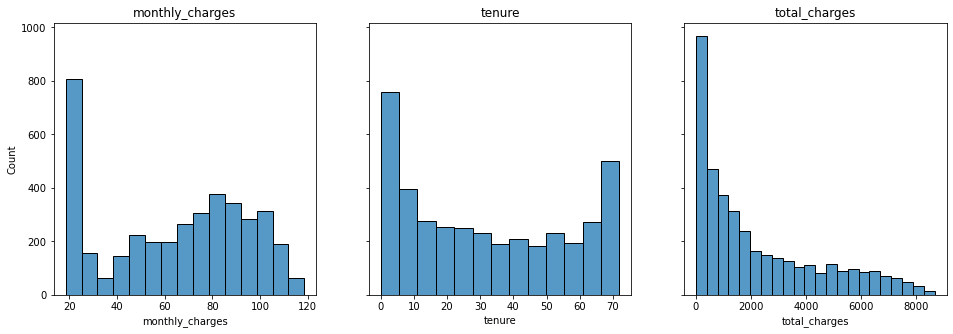

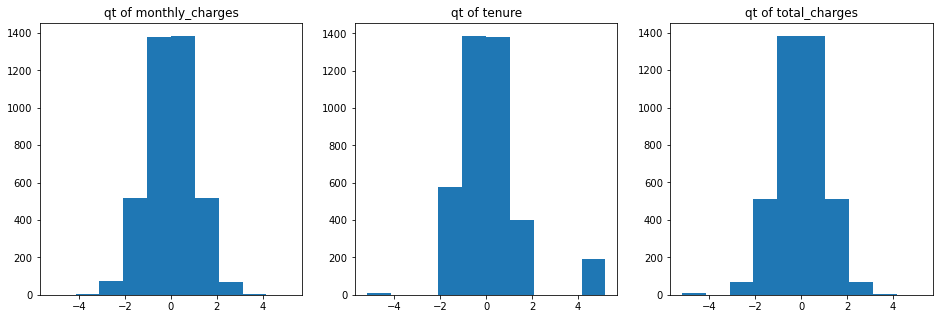

In [170]:
# plot originals
fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    sns.histplot(x = train[col], kde = False, ax = ax)
    ax.set(title = col)
    
# plot scaled
make_and_see_scalers(col_names, scaler= QuantileTransformer(output_distribution='normal'), scaler_name='qt')

In [164]:
qt_scaler = QuantileTransformer(output_distribution='uniform')
qt_scaler.fit(train[['monthly_charges']])

train['monthly_charges_qt'] = qt_scaler.transform(train[['monthly_charges']])

(array([401., 388., 394., 393., 394., 397., 392., 395., 394., 395.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

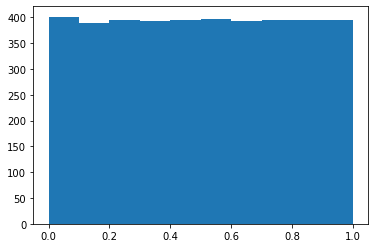

In [166]:
plt.hist(x = train['monthly_charges_qt'])

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

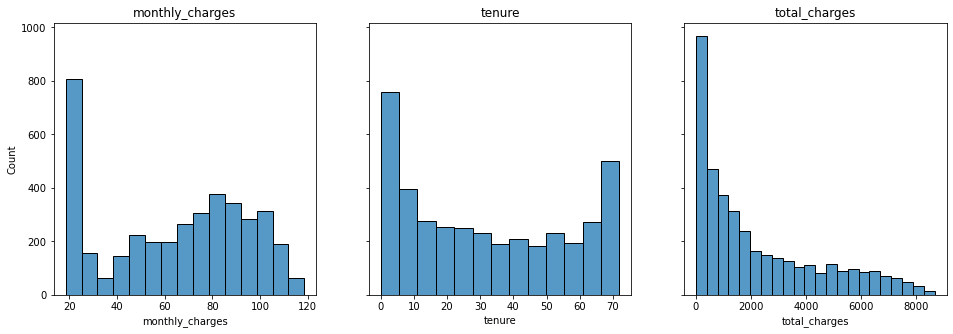

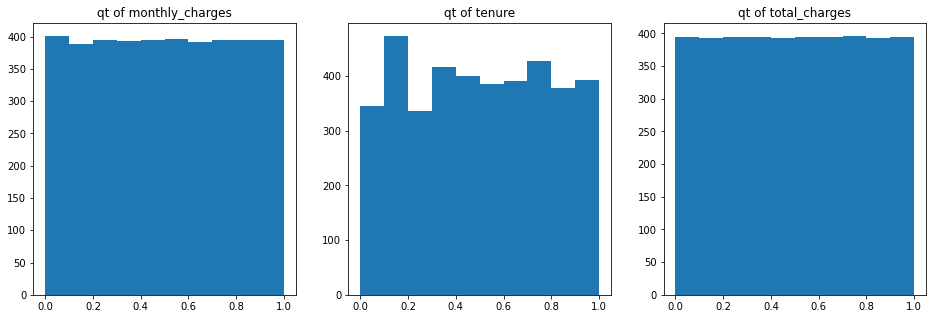

In [169]:
# plot originals
fig, axs = plt.subplots(1, 3, figsize=(16,5), sharey=True)

for ax, col in zip(axs, col_names):
    
    sns.histplot(x = train[col], kde = False, ax = ax)
    ax.set(title = col)

# plot quantile transformer
make_and_see_scalers(col_names, scaler= QuantileTransformer(),scaler_name='qt')

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

#### Plan for scaling
- Columns to scale: `monthly_charges` `tenure` and `total_charges`
- scaler: min_max
- Remember: fit on train, transform train, validate and split
- needs to be done after train validate and split
- add columns to original dataframe. then add those column names to a list so it's easy to pull out

In [175]:
# create list of columns to scale, maybe in the future this should be part of the input into this function

col_names = ['monthly_charges', 'tenure', 'total_charges']

#def function
def my_scaler(train, validate, test, scaler, scaler_name):
    
    '''
    This function takes in the train validate and test dataframes, a scaler (i.e. MinMaxScaler(), with whatever paramaters you need),
    scaler_name as a string.
    Scaler_name, should be what you want in the name of your new dataframe columns.
    Adds columns to the train validate and test dataframes. 
    Outputs scaler for doing inverse transforms.
    Ouputs a list of the new column names (what you can use to create the X_train).
    
    example: min_max_scaler, scaled_cols_list = my_scaler(train, validate, test, MinMaxScaler(), 'scaled_min_max')
    
    '''
    col_names = ['monthly_charges', 'tenure', 'total_charges']
    
    #create the scaler (input here should be minmax scaler)
    mm_scaler = scaler
    
    # make empty list for return
    scaled_cols_list = []
    
    # loop through columns in col names
    for col in col_names:
        
        #fit and transform to train, add to new column on train df
        train[f'{col}_{scaler_name}'] = mm_scaler.fit_transform(train[[col]])
        
        #transform cols from validate and test (only fit on train)
        validate[f'{col}_{scaler_name}']= mm_scaler.transform(validate[[col]])
        test[f'{col}_{scaler_name}']= mm_scaler.transform(test[[col]])
        
        #add new column name to the list that will get returned
        scaled_cols_list.append(f'{col}_{scaler_name}')
    
    #confirmation print
    print('Your scaled columns have been added to your train validate and test dataframes.')
    
    #returns scaler, and a list of column names that can be used in X_train, X_validate and X_test.
    return scaler, scaled_cols_list   


In [176]:
#import new data to test
df2 = w.wrangle_telco()

In [180]:
# split up the data
train, validate, test = w.banana_split(df2)

train --> (3943, 4)
validate --> (1691, 4)
test --> (1409, 4)


In [181]:
# what the train looks like before the function
train.head()

,customer_id,monthly_charges,tenure,total_charges
2118,3043-TYBNO,60.65,3,196.90
6206,8778-LMWTJ,74.85,9,708.20
877,1269-FOYWN,20.00,44,860.85
2407,3446-QDSZF,55.50,4,227.35
2780,3956-MGXOG,80.60,28,2244.95


In [182]:
# test new function! 
# there's this .loc warning that keeps coming up, maybe figure out how to fix it

min_max_scaler, scaled_cols_list = my_scaler(train, validate, test, MinMaxScaler(), 'scaled_min_max')

Your scaled columns have been added to your train validate and test dataframes.


<ipython-input-175-02d043035481>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{col}_{scaler_name}']= mm_scaler.transform(test[[col]])
<ipython-input-175-02d043035481>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{col}_{scaler_name}']= mm_scaler.transform(test[[col]])
<ipython-input-175-02d043035481>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [183]:
# see what train looks like afterwards, has the new columns! column names are a bit long, might need to work on naming convention
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled_min_max,tenure_scaled_min_max,total_charges_scaled_min_max
2118,3043-TYBNO,60.65,3,196.90,0.421446,0.041667,0.022710
6206,8778-LMWTJ,74.85,9,708.20,0.563092,0.125000,0.081683
877,1269-FOYWN,20.00,44,860.85,0.015960,0.611111,0.099290
2407,3446-QDSZF,55.50,4,227.35,0.370075,0.055556,0.026222
2780,3956-MGXOG,80.60,28,2244.95,0.620449,0.388889,0.258930


In [184]:
# validate worked too
validate.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled_min_max,tenure_scaled_min_max,total_charges_scaled_min_max
1499,2207-OBZNX,51.00,7,354.05,0.325187,0.097222,0.040836
3823,5376-DEQCP,70.60,1,70.60,0.520698,0.013889,0.008143
6677,9494-MRNYX,75.05,10,786.30,0.565087,0.138889,0.090691
6598,9375-MHRRS,50.05,6,288.35,0.315711,0.083333,0.033258
3006,4302-ZYFEL,20.55,69,1403.10,0.021446,0.958333,0.161832


In [188]:
# test worked too
test.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled_min_max,tenure_scaled_min_max,total_charges_scaled_min_max
2553,3649-JPUGY,88.60,72,6201.95,0.700249,1.000000,0.715326
7013,9948-YPTDG,79.45,38,3013.05,0.608978,0.527778,0.347522
1768,2585-KTFRE,70.45,1,70.45,0.519202,0.013889,0.008126
2267,3243-ZHOHY,20.10,16,296.15,0.016958,0.222222,0.034158
1489,2195-VVRJF,59.10,18,1011.05,0.405985,0.250000,0.116613


In [187]:
# the list of the scaled column names that are in train test and validate
scaled_cols_list

['monthly_charges_scaled_min_max',
 'tenure_scaled_min_max',
 'total_charges_scaled_min_max']

In [189]:
# the scaler that was ouput by the function
min_max_scaler

MinMaxScaler()